In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Analisis ini dilakukan untuk membuat model prediksi seseorang melakukan kredit motor macet atau tidak berdasarkan feature gender, status perkawinan, pendidikan, pekerjaan, penghasilan, pengeluaran dan status kepemilikan rumah

# Preprocessing

In [3]:
data_motor = pd.read_csv("datakreditmotor.csv")
data_motor.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,1,0,1,2,3,1,2,2
1,1,0,1,2,2,2,3,2
2,0,0,1,2,2,2,2,1
3,0,1,1,1,3,3,2,2
4,0,0,2,2,2,2,2,1


0 = kredit motor tidak macet

1 = kredit motor macet

In [4]:
data_motor.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

tidak perlu dilakukan impute atau drop data karena tidak ada data yang missing

# Visualisasi

## Var Y

Y
0    521
1    169
Name: count, dtype: int64


<Axes: title={'center': 'Komposisi Variabel Target'}, xlabel='Y', ylabel='proportion'>

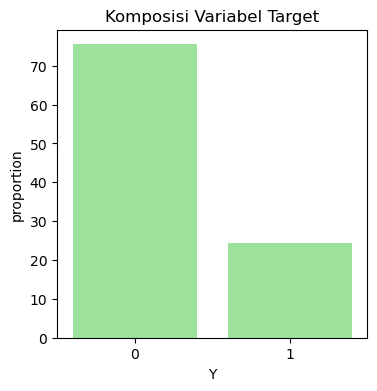

In [34]:
print(data_motor['Y'].value_counts())
plt.figure(figsize=(4, 4))
plt.title("Komposisi Variabel Target")
sns.barplot(data=data_motor['Y'].value_counts(normalize=True) * 100, color = "lightgreen")

Pada data target di atas, sebanyak 521 orang tidak melakukan kredit macet sedangkan 169 orang kredit macet. Data target ini sangat tidak seimbang sehingga diperlukan penanganan data tidak seimbang yaitu dengan metode SMOTE.

## Var X

### X1 = Gender

Presentase Komposisi pada X1 (Gender):
X1
1    60.144928
0    39.855072
Name: proportion, dtype: float64

Persentase Komposisi Y pada X1:
Y           0          1
X1                      
0   55.636364  44.363636
1   88.674699  11.325301 



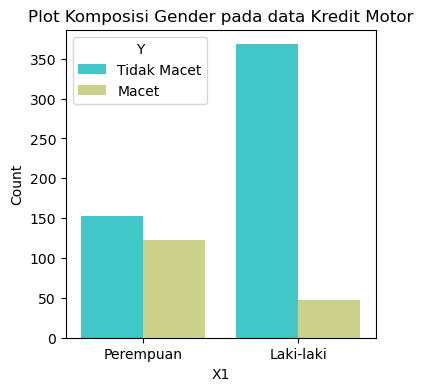

In [9]:
#X1 -> 0 = perempuan, 1 = laki-laki
#Y -> 0 = Tidak macet, 1 = macet

#Komposisi pada X1
print("Presentase Komposisi pada X1 (Gender):")
print(data_motor['X1'].value_counts(normalize=True)*100)

#Komposisi X1 dan Y
composition = data_motor.groupby(['X1', 'Y']).size().unstack()
composition_percentage = composition.div(composition.sum(axis=1), axis=0) * 100
print("\nPersentase Komposisi Y pada X1:")
print(composition_percentage, "\n")

#Plot Komposisi X1 dan Y
plt.figure(figsize=(4, 4))
sns.countplot(data=data_motor, x='X1', hue='Y', palette='rainbow')
plt.title('Plot Komposisi Gender pada data Kredit Motor')
plt.xlabel('X1')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Tidak Macet', 'Macet'])
plt.xticks(ticks=[0, 1], labels=['Perempuan', 'Laki-laki']) #Mengubah label pada sumbu x
plt.show()

X1 = Pada data ini lebih banyak laki laki (60%) yang mengajukan kredit daripada perempuan (40%). Ternyata kebanyakan perempuan (hampir setengahnya memiliki riwayat kredit macet) sedangkan laki laki hanya kurang lebih 11% saja yang macet, kebanyakan kreditnya tidak macet yaitu sebanyak 88%. 

### X2 = Status Perkawinan

Presentase Komposisi pada X2 (Status Perkawinan):
X2
1    76.376812
3    16.811594
2     6.811594
Name: proportion, dtype: float64

Persentase Komposisi Y pada X2:
Y           0          1
X2                      
1   70.777989  29.222011
2   76.595745  23.404255
3   96.551724   3.448276 



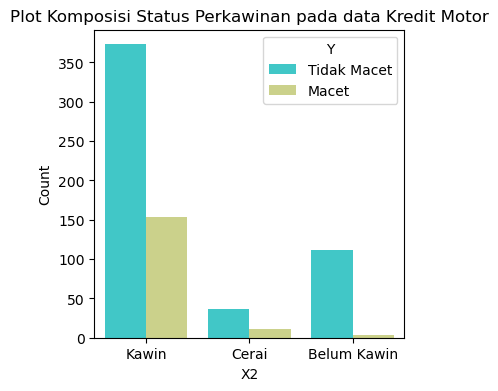

In [11]:
#X2 -> 1 = Kawin, 2 = cerai, 3 = belum kawin
#Y -> 0 = Tidak macet, 1 = macet

#Komposisi pada X2
print("Presentase Komposisi pada X2 (Status Perkawinan):")
print(data_motor['X2'].value_counts(normalize=True)*100)

#Komposisi X2 dan Y
composition = data_motor.groupby(['X2', 'Y']).size().unstack()
composition_percentage = composition.div(composition.sum(axis=1), axis=0) * 100
print("\nPersentase Komposisi Y pada X2:")
print(composition_percentage, "\n")

#Plot Komposisi X2 dan Y
plt.figure(figsize=(4, 4))
sns.countplot(data=data_motor, x='X2', hue='Y', palette='rainbow')
plt.title('Plot Komposisi Status Perkawinan pada data Kredit Motor')
plt.xlabel('X2')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Tidak Macet', 'Macet'])
plt.xticks(ticks=[0, 1, 2], labels=['Kawin', 'Cerai', 'Belum Kawin']) #Mengubah label pada sumbu x
plt.show()

X2 = Status menikah lebih banyak dijumpai pada data kredit motor ini sebesar lebih dari 70% melakukan kredit motor. Persentase untuk macet juga lebih besar dari yang lain yaitu sebesar 29%. Untuk status belum menikah, banyak juga yang mengajukan kredit motor namun persentase untuk macetnya sangat kecil yaitu di angka 3% saja.

### X3 = Pendidikan

Presentase Komposisi pada X3 (Pendidikan):
X3
2    73.623188
1    20.289855
3     6.086957
Name: proportion, dtype: float64

Persentase Komposisi Y pada X3:
Y           0          1
X3                      
1   69.285714  30.714286
2   76.377953  23.622047
3   85.714286  14.285714 



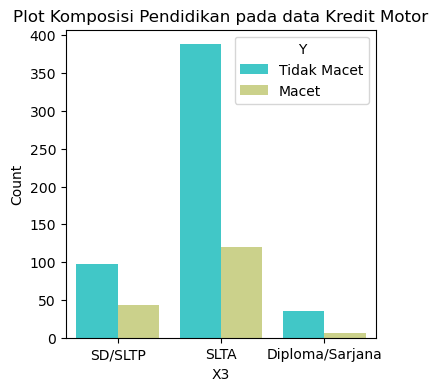

In [15]:
#X3 -> 1 = SD/SLTP, 2 = SLTA, 3 = Diploma/Sarjana
#Y -> 0 = Tidak macet, 1 = macet

#Komposisi pada X3
print("Presentase Komposisi pada X3 (Pendidikan):")
print(data_motor['X3'].value_counts(normalize=True)*100)

#Komposisi X3 dan Y
composition = data_motor.groupby(['X3', 'Y']).size().unstack()
composition_percentage = composition.div(composition.sum(axis=1), axis=0) * 100
print("\nPersentase Komposisi Y pada X3:")
print(composition_percentage, "\n")

#Plot Komposisi X3 dan Y
plt.figure(figsize=(4, 4))
sns.countplot(data=data_motor, x='X3', hue='Y', palette='rainbow')
plt.title('Plot Komposisi Pendidikan pada data Kredit Motor')
plt.xlabel('X3')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Tidak Macet', 'Macet'])
plt.xticks(ticks=[0, 1, 2], labels=['SD/SLTP', 'SLTA', 'Diploma/Sarjana']) #Mengubah label pada sumbu x
plt.show()

X3 = Pada data ini, seseorang dengan lulusan terakhir SLTA memiliki presentase mengajukan kredit motor terbanyak yaitu 76% sedangkan lulusan Diploma/Sarjana hanya 6% saja. Walaupun lulusan SLTA memiliki jumlah macet yang tinggi namun presentase untuk macet pada lulusan SD lebih besar yaitu 30%

### X4 = Pekerjaan

Presentase Komposisi pada X4 (Pekerjaan):
X4
2    45.942029
3    35.797101
5    11.159420
4     3.768116
1     3.333333
Name: proportion, dtype: float64

Persentase Komposisi Y pada X4:
Y           0          1
X4                      
1   78.260870  21.739130
2   86.119874  13.880126
3   70.850202  29.149798
4   61.538462  38.461538
5   50.649351  49.350649 



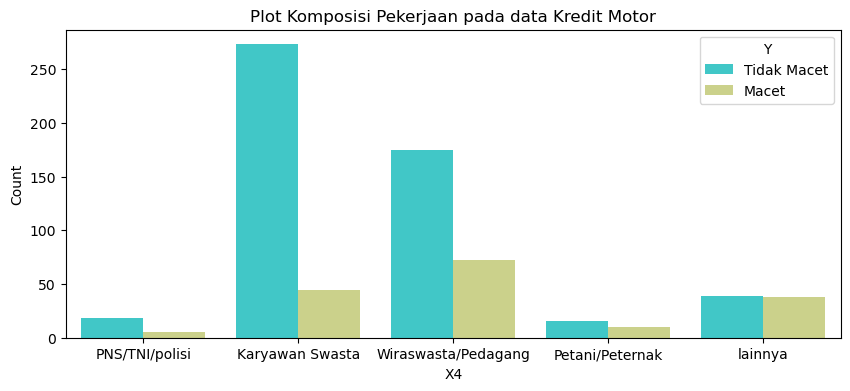

In [17]:
#X4 -> 1 = PNS/TNI/polisi/BUMN/pegawai pemerintah, 2 = Karyawan Swasta, 3 = Wiraswasta/Pedagang, 4 = Petani/Peternak/Nelayan, 5 = lainnya
#Y -> 0 = Tidak macet, 1 = macet

#Komposisi pada X4
print("Presentase Komposisi pada X4 (Pekerjaan):")
print(data_motor['X4'].value_counts(normalize=True)*100)

#Komposisi X4 dan Y
composition = data_motor.groupby(['X4', 'Y']).size().unstack()
composition_percentage = composition.div(composition.sum(axis=1), axis=0) * 100
print("\nPersentase Komposisi Y pada X4:")
print(composition_percentage, "\n")

#Plot Komposisi X4 dan Y
plt.figure(figsize=(10, 4))
sns.countplot(data=data_motor, x='X4', hue='Y', palette='rainbow')
plt.title('Plot Komposisi Pekerjaan pada data Kredit Motor')
plt.xlabel('X4')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Tidak Macet', 'Macet'])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['PNS/TNI/polisi', 'Karyawan Swasta', 'Wiraswasta/Pedagang', 'Petani/Peternak','lainnya']) #Mengubah label pada sumbu x
plt.show()

X4 = Orang dengan pekerjaan Karyawan Swasta memiliki kecenderungan untuk mengajukan kredit (pada data ini sebesar 45%) tetapi cukup sedikit yang macet kredit hanya sekitar 13% saja. Wiraswasta atau pedagang memiliki jumlah macet kredit yang paling besar (hampir 100 orang) namun untuk persentase, pekerjaan lainnya memiliki persentase macet sebesar 49% (sangat besar)

### X5 = Penghasilan

Presentase Komposisi pada X5 (Penghasilan):
X5
2    70.144928
1    18.115942
3    11.739130
Name: proportion, dtype: float64

Persentase Komposisi Y pada X5:
Y            0          1
X5                       
1     8.800000  91.200000
2    88.636364  11.363636
3   100.000000        NaN 



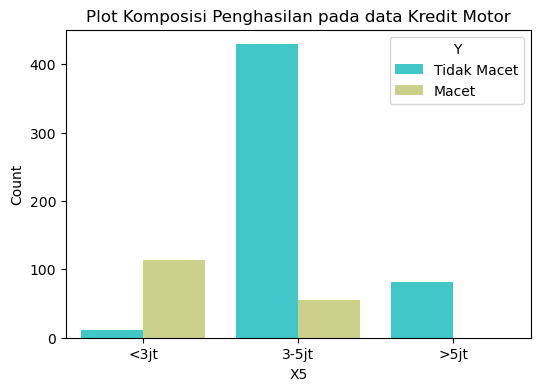

In [19]:
#X5 -> 1 = <3jt, 2 = 3jt - 5jt, 3 = >5jt
#Y -> 0 = Tidak macet, 1 = macet

#Komposisi pada X5
print("Presentase Komposisi pada X5 (Penghasilan):")
print(data_motor['X5'].value_counts(normalize=True)*100)

#Komposisi X5 dan Y
composition = data_motor.groupby(['X5', 'Y']).size().unstack()
composition_percentage = composition.div(composition.sum(axis=1), axis=0) * 100
print("\nPersentase Komposisi Y pada X5:")
print(composition_percentage, "\n")

#Plot Komposisi X5 dan Y
plt.figure(figsize=(6, 4))
sns.countplot(data=data_motor, x='X5', hue='Y', palette='rainbow')
plt.title('Plot Komposisi Penghasilan pada data Kredit Motor')
plt.xlabel('X5')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Tidak Macet', 'Macet'])
plt.xticks(ticks=[0, 1, 2], labels=['<3jt', '3-5jt', '>5jt']) #Mengubah label pada sumbu x
plt.show()

X5 = Seseorang dengan penghasilan 3 - 5jt paling sering mengajukan kredit motor namun jarang macet atau hanya 11% (kurang dari 100 orang). Orang dengan penghasilan kurang dari 3jt lah yang paling sering macet kreditnya yaitu 91% dari semua orang yang berpenghasilan kurang dari 3 juta. Sedangkan orang yang berpenghasilan 5 juta tidak pernah macet, 100% tidak macet. 

### X6 = Pengeluaran

Presentase Komposisi pada X6 (Pengeluaran):
X6
2    80.724638
1    13.333333
3     5.942029
Name: proportion, dtype: float64

Persentase Komposisi Y pada X6:
Y           0          1
X6                      
1   90.217391   9.782609
2   74.506284  25.493716
3   56.097561  43.902439 



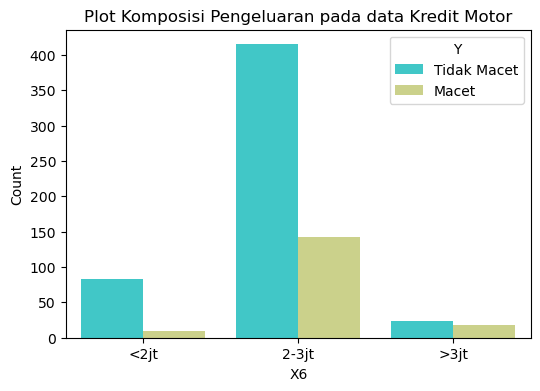

In [21]:
#X6 -> 1 = <2jt, 2 = 2jt - 3jt, 3 = >3jt
#Y -> 0 = Tidak macet, 1 = macet

#Komposisi pada X6
print("Presentase Komposisi pada X6 (Pengeluaran):")
print(data_motor['X6'].value_counts(normalize=True)*100)

#Komposisi X6 dan Y
composition = data_motor.groupby(['X6', 'Y']).size().unstack()
composition_percentage = composition.div(composition.sum(axis=1), axis=0) * 100
print("\nPersentase Komposisi Y pada X6:")
print(composition_percentage, "\n")

#Plot Komposisi X6 dan Y
plt.figure(figsize=(6, 4))
sns.countplot(data=data_motor, x='X6', hue='Y', palette='rainbow')
plt.title('Plot Komposisi Pengeluaran pada data Kredit Motor')
plt.xlabel('X6')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Tidak Macet', 'Macet'])
plt.xticks(ticks=[0, 1, 2], labels=['<2jt', '2-3jt', '>3jt']) #Mengubah label pada sumbu x
plt.show()

X6 = Seseorang yang sering mengajukan kredit ternyata memiliki pengeluaran 2-3jt tiap bulan. Untuk jumlah seseorang yang macet lebih banyak pada pengeluaran 2-3jt namun untuk presentase macet lebih banyak pada seseorang dengan pengeluaran lebih dari 3jt perbulan.

### X7 = Status Kepemilikan Rumah

Presentase Komposisi pada X7 (Status Kepemilikan Rumah):
X7
2    52.898551
1    38.260870
3     8.840580
Name: proportion, dtype: float64

Persentase Komposisi Y pada X7:
Y           0          1
X7                      
1   84.848485  15.151515
2   68.493151  31.506849
3   77.049180  22.950820 



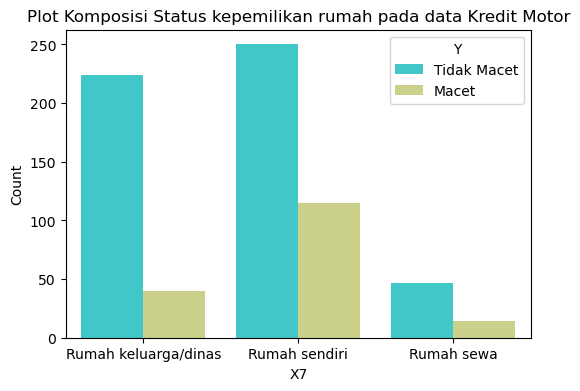

In [13]:
#X7 -> 1 = Rumah keluarga/rumah dinas, 2 = Rumah sendiri, 3 = Rumah sewa
#Y -> 0 = Tidak macet, 1 = macet

#Komposisi pada X7
print("Presentase Komposisi pada X7 (Status Kepemilikan Rumah):")
print(data_motor['X7'].value_counts(normalize=True)*100)

#Komposisi X7 dan Y
composition = data_motor.groupby(['X7', 'Y']).size().unstack()
composition_percentage = composition.div(composition.sum(axis=1), axis=0) * 100
print("\nPersentase Komposisi Y pada X7:")
print(composition_percentage, "\n")

#Plot Komposisi X7 dan Y
plt.figure(figsize=(6, 4))
sns.countplot(data=data_motor, x='X7', hue='Y', palette='rainbow')
plt.title('Plot Komposisi Status kepemilikan rumah pada data Kredit Motor')
plt.xlabel('X7')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Tidak Macet', 'Macet'])
plt.xticks(ticks=[0, 1, 2], labels=['Rumah keluarga/dinas', 'Rumah sendiri', 'Rumah sewa']) #Mengubah label pada sumbu x
plt.show()

X7 = Seseorang yang mengajukan kredit motor kebanyakan sudah memiliki rumah sendiri, namun kebanyakan dari mereka juga macet saat melakukan kredit (31%)

## Korelasi X dan Y

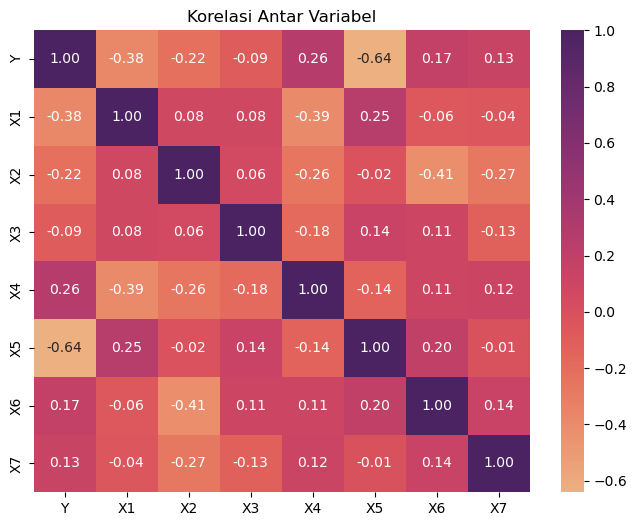

In [101]:
corr_data_motor = data_motor.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data_motor, annot=True, cmap='flare', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

Tidak semua data memiliki korelasi yang kuat dengan variabel target Y, contohnya X3 (pendidikan) hanya memiliki korelasi sebesar -0,09 saja. Sedangkan X5 (penghasilan) memiliki korelasi yang sangat kuat dan negatif yaitu -0,64. Semakin kecil penghasilannya (0) maka semakin sering juga untuk melakukan kredit macet (1). Beberapa variabel memiliki korelasi kuat satu sama lain, paling besar korelasinya yaitu variabel X2 (status perkawinan) dan X6 (jumlah pengeluaran) sebesar -0,41. Hal ini memiliki arti seseorang yang sudah menikah (0) lebih banyak memiliki pengeluaran (1)

## Kesimpulan Visualisasi

1. Data memiliki ketidakseimbangan pada target (Y) yaitu 70% tidak macet dan 30% macet sehingga perlu dilakukan tindakan agar datanya seimbang, penanganan yang akan dilakukan adalah SMOTE (membuat data baru minortitas(macet) agar jumlahnya sama dengan data mayoritas(tidak macet)).
2. Menurut visualisasi yang sudah dilakukan, secara kasarnya seseorang berkemungkinan tinggi untuk macet saat melakukan kredit motor bila seorang perempuan, status sudah Kawin, pendidikan terakhirnya sd/slta atau sltp, memiliki pekerjaan wiraswasta/pedagang atau lainnya, berpengasilan kurang dari 3jt, memiliki pengeluaran lebih dari 3jt, serta memiliki rumah sendiri atau pribadi (bukan sewa/dinas).
3. Variabel dengan korelasi terkecil dengan kecenderungan macet kredit (Y) adalah pendidikan (X3) sedangkan dengan korelasi paling besar adalah penghasilan (X5). Antar feature memiliki korelasi kuat yaitu status perkawinan (X2) dan jumlah pengeluaran (X6).

# Penanganan Data Imbalance dengan SMOTE

In [103]:
feature = ['X1', 'X2','X3','X4', 'X5', 'X6', 'X7']
target = 'Y'

In [105]:
X = pd.get_dummies(data_motor[feature]) #convert categorical variable into dummy
y = data_motor[target]

In [109]:
smote=SMOTE(sampling_strategy='minority') 
X_smote,y_smote=smote.fit_resample(X,y)

Y
1    521
0    521
Name: count, dtype: int64


<Axes: title={'center': 'Komposisi Variabel Target'}, xlabel='Y', ylabel='proportion'>

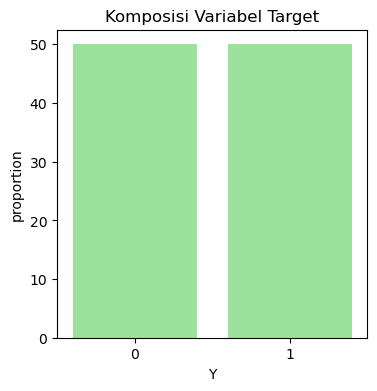

In [111]:
print(y_smote.value_counts())
plt.figure(figsize=(4, 4))
plt.title("Komposisi Variabel Target")
sns.barplot(data=y_smote.value_counts(normalize=True) * 100, color = "lightgreen")

Setelah dilakukan proses smote, data 0 dan 1 pada variabel target menjadi seimbang sehingga hasil prediksi 0 dan 1 juga akan semakin baik

# Modelling

## Non smote

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)

In [115]:
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

In [117]:
y_pred = model.predict(X_test)

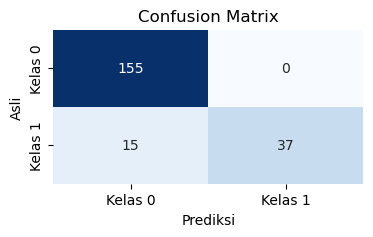

In [119]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Kelas 0', 'Kelas 1'], yticklabels=['Kelas 0', 'Kelas 1'])
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title("Confusion Matrix")
plt.show()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       155
           1       1.00      0.71      0.83        52

    accuracy                           0.93       207
   macro avg       0.96      0.86      0.89       207
weighted avg       0.93      0.93      0.92       207



diperoleh nilai confussion matrix seperti di atas. Dapat terlihat, model tidak salah sama sekali pada prediksi 0 (kredit tidak macet) tapi pada kelas 1 (kredit macet) hanya 71% saja yang diprediksi benar. Hal ini menjelaskan bahwa dengan data yang kurang seimbang, model hanya terus mempelajari data dengan jumlah yang terbanyak yaitu 0 (tidak macet) saja, sedangkan untuk kelas macet tidak memiliki data yang cukup untuk dipelajari sehingga hasil prediksinya juga kurang bagus.

## Dengan data SMOTE

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.3,random_state = 123)

In [123]:
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

In [125]:
y_pred = model.predict(X_test)

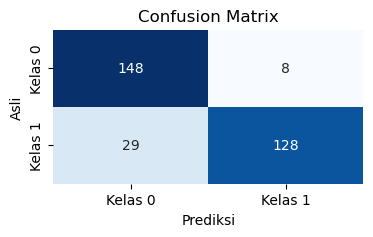

In [127]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Kelas 0', 'Kelas 1'], yticklabels=['Kelas 0', 'Kelas 1'])
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title("Confusion Matrix")
plt.show()

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       156
           1       0.93      0.83      0.88       157

    accuracy                           0.88       313
   macro avg       0.89      0.88      0.88       313
weighted avg       0.89      0.88      0.88       313



diperoleh nilai confussion matrix seperti di atas. Meskipun terlihat bahwa pada pengujian kelas 0 (tidak macet) memiliki kesalahan sebesar sepuluh atau 6% dari data kelas 0 serta nilai akurasi yang turun 4% menjadi 88% saja, namun kelas 1 bisa diprediksi benar sebesar 83%, meningkat 12% dari data tanpa penanganan smote. Nilai precision, recall, f1-score serta akurasi juga memiliki nilai lebih dari 80% sehingga model regresi logistik ini dianggap mampu untuk memprediksi data kredit macet dengan tepat. 

## Kesimpulan

Meskipun akurasi model pada data yang belum dilakukan penanganan lebih bagus yaitu 92% dibandingkan setelah penanganan yaitu 88%, namun pada precision, recall, f1-score pada data 0 dan 1 memiliki nilai yang seimbang yaitu berkisar antara 80% - 100%. Pada data sebelum penanganan, ada nilai recall sebesar 71% pada data 1 sedangkan data 0 sebesar 100%, ini berarti model pada data sebelum penanganan smote dapat dengan tepat mengidentifikasi data 0 atau data tidak macet sedangkan pada data macet sulit diidentifikasi kebenarannya. Sehingga dipilih data setelah penanganan atau setelah melakukan smote untuk pembuatan model.

# Estimasi model Regresi Logistik

In [133]:
print(model.coef_)
print(model.intercept_)

[[-1.21580049 -1.30873433 -0.39456351 -0.39042939 -4.9076532   2.37787008
   0.39295679]]
[7.35133213]


Sehingga model regresi logistiknya adalah

logit(p) = 7.35133213 - 1.21580049X1 - 1.30873433X2 - 0.39456351X3 - 0.39042939X4 - 4.9076532X5 + 2.37787008X6 + 0.39295679X7

dengan p = 1

Model regresi logistik tersebut memiliki hasil yang mirip dengan kesimpulan visualisasi. Contohnya : 
1. Pada X1 bernilai negatif, semakin 0 atau perempuan maka targetnya semakin 1 (macet).
2. Lalu pada X2 bernilai negatif juga, semakin 1 atau sudah kawin maka targetnya semakin 1 (macet).
3. Selanjutnya pada X3 dan X4 kurang menggambarkan karena koefisiennya -1<koef<1.
4. Pada X5 koefisiennya besar maka dampak negatifnya juga besar terhadap target, semakin 0 (penghasilan kurang dari 3 juta) maka semakin 1 (macet).
5. Pada X6 memiliki koefisien yang cukup besar dan positif terhadap target yaitu semakin 0 (pengeluaran kurang dari 3 juta) maka semakin 0 juga (tidak macet).
6. Pada X7 kurang digambarkan karena koefisiennya kecil, namun berdampak positif